# Gallery: PHOEBE Meshes in 3D

In [1]:
import autofig
import numpy as np
import phoebe # PHOEBE 2.1.0

In [2]:
#autofig.inline()

In [3]:
times = np.linspace(0,1,21)

# create an "interesting" system in PHOEBE
b = phoebe.default_binary()
b.set_value('incl@orbit', 75)
b.set_value('q', 0.5)
b.set_value('requiv@secondary', 0.6)

# add datasets and compute the model
b.add_dataset('orb', times=times)
b.add_dataset('rv', times=times, datset='rv01')
b.add_dataset('mesh', times=[], include_times=['rv01'], columns=['rvs@rv01'])
b.run_compute(irrad_method='none')

<ParameterSet: 146 parameters | kinds: rv, mesh, orb>

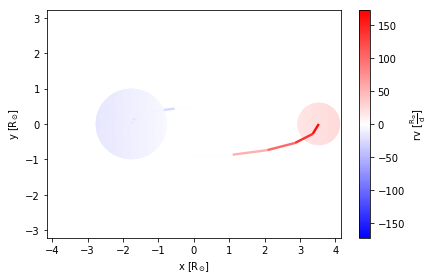

In [4]:
autofig.reset()

for c in ['primary', 'secondary']:
    xs = b.get_value(component=c, qualifier='us', context='model', kind='orb')
    ys = b.get_value(component=c, qualifier='vs', context='model', kind='orb')
    zs = b.get_value(component=c, qualifier='ws', context='model', kind='orb')
    rvs = b.get_value(component=c, qualifier='rvs', context='model', kind='rv')
        
    # plot the orbit with RV as the color
    autofig.plot(xs, ys, zs, i=times,
                 xlabel='x', xunit='solRad',
                 ylabel='y', yunit='solRad',
                 c=rvs, cmap='bwr', clabel='rv', cunit='solRad/d',
                 s=0.03, highlight=False,
                 uncover=True, trail=0.3,
                 linestyle='solid', marker='none')

    
    for t in times:
        verts = b.get_value(time=t, component=c, qualifier='uvw_elements', context='model')
        rvs = b.get_value(time=t, component=c, qualifier='rvs', context='model')
        xs = verts[:, :, 0]
        ys = verts[:, :, 1]
        zs = verts[:, :, 2]
                     
        # plot the mesh at this time, with RV as facecolor
        autofig.mesh(x=xs, y=ys, z=zs, i=t,
                     xlabel='x', xunit='solRad', 
                     ylabel='y', yunit='solRad',
                     fc=rvs, fcmap='bwr', fclim='symmetric', fclabel='rv', fcunit='solRad/d', 
                     ec='none')
        

        
mplfig = autofig.draw(i=times[5], save='phoebe_meshes_3d.png')

Now let's set the projection to '3d', set the range for the viewing angles and disable pad_aspect (as it doesn't play nicely with animations).

In [5]:
autofig.gcf().axes.pad_aspect=False
autofig.gcf().axes.projection = '3d'
autofig.gcf().axes.elev.value = [0, 30]
autofig.gcf().axes.azim.value = [-75, 0]

In [6]:
anim = autofig.animate(i=times, tight_layout=False, 
                       save='phoebe_meshes_3d.gif', save_kwargs={'writer': 'imagemagick'})

![animation](phoebe_meshes_3d.gif)